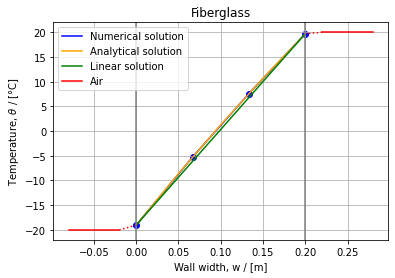

In [1]:
import sys
sys.path.append('../src')  # Add 'scr' directory to the system path
import var_cond


def sim_Fiberglass(width, mesh, air_temp, flow_surf, conv_coef, Tb):  
    # data linear model
    deg = 1

    a, b = 0.0002, 0.04         # fitted λ(T) = a * T + b

    # Model λ(T) = a*T + b to λ(T) = λ0 * (1 + β * (T - Tb))
    λ0, β, θ0 = var_cond.poly2model([a, b], Tb, deg)
    conductivity_model = [λ0, β, Tb, deg]

    θ, q, x = var_cond.wall_num(conductivity_model, width, mesh,
                                air_temp, flow_surf, conv_coef)
    x_w, θ_w = x[1:-1], θ[1:-1]     # wall

    surf_temp = θ[0], θ[-1]

    # Analytical solution
    θ_a, q_a, x_a = var_cond.dirichlet_anal(conductivity_model, width,
                                            surf_temp, num=5)

    var_cond.wall_plot(x, θ, x_a, θ_a, air_temp, material='Fiberglass');
    
    return q, conductivity_model


# Data
width = 0.20                # m, width of the plane wall in number of meshes
mesh = 3                    # number of meshes
air_temp = -20, 20          # °C, air temperatures outdoor; indoor
flow_surf = 0, 0            # W/m², flow on surfaces outdoor, indoor
conv_coef = 8, 25           # W/(m·K²), convection coefficients outdoor, indoor
Tb = 20                     # °C, mean (base) temperature


q, conductivity_model  = sim_Fiberglass(width, mesh, air_temp, flow_surf, conv_coef, Tb) 

In [2]:
import numpy as np
np.diff(air_temp)

array([40])

In [3]:
λ0, β, Tb, deg = conductivity_model
q_m = -λ0 / width * np.diff(air_temp)
print(q[0], q_m, Tb)

-7.756799442964905 [-8.8] 20


-7.756799534630886 [-8.] 0


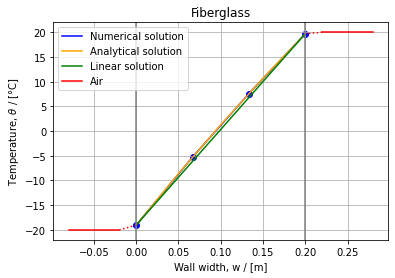

In [4]:
Tb = 0
q, conductivity_model  = sim_Fiberglass(width, mesh, air_temp, flow_surf, conv_coef, Tb)
λ0, β, Tb, deg = conductivity_model
q_m = -λ0 / width * np.diff(air_temp)
print(q[0], q_m, Tb)

-7.756799566783627 [-7.72] -7


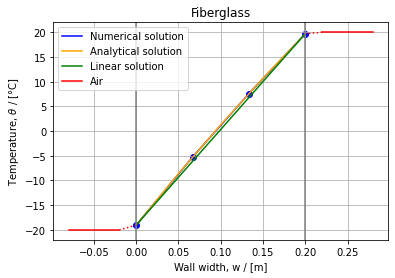

In [5]:
Tb = -7
air_temp = -20, 20
q, conductivity_model  = sim_Fiberglass(width, mesh, air_temp, flow_surf, conv_coef, Tb)
λ0, β, Tb, deg = conductivity_model
q_m = -λ0 / width * np.diff(air_temp)
print(q[0], q_m, Tb)

In [6]:
q_m

array([-7.72])

q = -105.49, q_m = -8.00, ε = -92.42 %


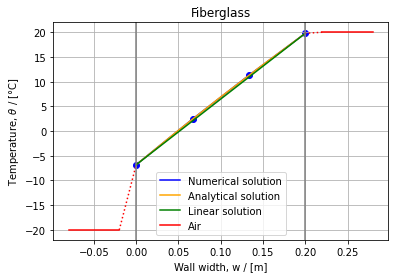

In [7]:
Tb = 0
air_temp = -20, 20
flow_surf = 100, 0 

q, conductivity_model  = sim_Fiberglass(width, mesh, air_temp, flow_surf, conv_coef, Tb)
λ0, β, Tb, deg = conductivity_model
q_m = -λ0 / width * np.diff(air_temp)
ε = (q_m - q[0]) / q[0]
print(f'q = {q[0]:.2f}, q_m = {q_m[0]:.2f}, ε = {ε[0]*100:.2f} %')